# Advent of Code 2025 Solutions

# [Day 1: Secret Entrance](https://adventofcode.com/2025/day/1)

## Part 1

In [1]:
with open('input1.txt', 'r') as file:
    input_text = file.read()

In [2]:
def get_rotations(input_text):
    lines = input_text.strip().splitlines()
    return lines

We just need to keep track of where our `dial` is pointing. Since the dial is a circle, we can look at the remainder $\mod{100}$ everytime we rotate our dial by a certain amount. Every time our dial points at `0` after a rotation, we add one to our counter.

In [3]:
rotations = get_rotations(input_text)
dial = 50
zero_counter = 0
for rotation in rotations:
    direction = rotation[0]
    distance = int(rotation[1:])
    shift = distance if direction == 'R' else - distance
    dial = (dial + shift) % 100
    if dial == 0:
        zero_counter += 1

In [4]:
zero_counter

1177

## Part 2

For this part, we add or subtract the appropriate distance based on the direction of our rotation and keep track of this value *without* modding by 100. Let `start` be the state of our dial before a rotation and `end` be the state of our dial after a rotation. Then the number of clicks that occur during this rotation corresponds to the number of multiples of 100 between our `start` and `end`. We can count this in most cases with $$\left \vert \left \lfloor \frac{\textrm{start}}{100} \right\rfloor - \left\lfloor \frac{\textrm{end}}{100} \right\rfloor \right \vert.$$

The caveat is that if we are rotating left, and we start on a multiple of 100, this method will count an additional click that we do not want to count. For example, if `start = 100` and our rotation is `L5` to get `end = 95`, this corresponds to our `dial` starting at `0` and ending at `95`. We do not want count a click in this rotation, but $$\left \lfloor \frac{100}{100} \right\rfloor - \left\lfloor \frac{95}{100} \right\rfloor = 1 - 0 = 1,$$
so our initial counting method would count 1 click during this rotation.

Similarly, if we are rotating left, and we end on a multiple of 100, we want to count this end state as a click even though `floor(start/100) - floor(end/100)` will not detect this. For example, consider `start = 340` with rotation `L40` to give us `end = 200`. This corresponds to our `dial` starting at `40`, wrapping all the way around once, and then rotating further to end at `0`. This means we should count `2` clicks in this rotation, but $$\left \lfloor \frac{340}{100} \right\rfloor - \left\lfloor \frac{200}{100} \right\rfloor = 3 - 2 = 1.$$ To fix both of these edge cases, we add in two if statements to adjust the number of clicks in a left-rotation accordingly.

In [5]:
dial = 50
click_counter = 0
for rotation in rotations:
    direction = rotation[0]
    distance = int(rotation[1:])
    
    if direction == 'R':
        start = dial
        dial += distance
        end = dial
    else:
        start = dial
        if start % 100 == 0:
            start -= 1
        dial -= distance
        end = dial
        if end % 100 == 0:
            end -= 1
    click_counter += abs(start//100 - end//100)

In [6]:
click_counter

6768

# [Day 2: Gift Shop](https://adventofcode.com/2025/day/2)

## Part 1

In [1]:
with open('input2.txt', 'r') as file:
    input_text = file.read()

In [33]:
input_text = "11-22,95-115,998-1012,1188511880-1188511890,222220-222224,1698522-1698528,446443-446449,38593856-38593862,565653-565659,824824821-824824827,2121212118-2121212124"

In [2]:
def get_id_ranges(input_text):
    ranges = input_text.strip().split(',')
    ranges = [[int(bound) for bound in bounds.split('-')] for bounds in ranges]
    return ranges

To check if an ID is valid, we split the ID into two equal halves and check if they are equal. Note that this means any odd length ID will automatically be valid.

In [3]:
def is_valid_id(ID):
    id_str = str(ID)
    n = len(id_str)
    if n % 2 != 0:
        return True
    first = id_str[:n//2]
    second = id_str[n//2:]
    return first != second

In [4]:
id_ranges = get_id_ranges(input_text)
total = 0
for id_range in id_ranges:
    lower, upper = id_range
    for i in range(lower, upper + 1):
        if not is_valid_id(i):
            total += i

In [5]:
total

34826702005

## Part 2

Let the length of our ID be $n$. For every $1 \leq k \leq \frac{n}{2}$ divding $n$, we can divide the ID into $m = \frac{n}{k}$ equal substrings of length $k$. This ID is invalid if the $m$ substrings of length $k$ are equal for any $k$ dividing $n$. Otherwise, the ID is valid.

In [6]:
def k_repetitions(id_str, n, k):
    m = n//k
    first = id_str[:k]
    for i in range(1, m):
        if first != id_str[i*k:(i+1)*k]:
            return False
    return True

def is_valid_id_2(ID):
    id_str = str(ID)
    n = len(id_str)
    for k in range(1, n//2+1):
        if n % k == 0 and k_repetitions(id_str,n,k):
            return False
    return True

In [7]:
id_ranges = get_id_ranges(input_text)
total = 0
for id_range in id_ranges:
    lower, upper = id_range
    for i in range(lower, upper + 1):
        if not is_valid_id_2(i):
            total += i

In [8]:
total

43287141963

# [Day 3: Lobby](https://adventofcode.com/2025/day/3)

## Part 1

In [1]:
with open('input3.txt', 'r') as file:
    input_text = file.read()

In [2]:
def get_banks(input_text):
    banks = input_text.strip().splitlines()
    banks = [[int(battery) for battery in bank]for bank in banks]
    return banks

To figure out the first battery to turn on, we want to choose the largest joltage battery that is not last in the bank. Moreover, if there are multiple batteries in the bank that attain the maximum joltage, we want to choose the leftmost one, so that way we can select another maximum joltage battery as our second battery.

In [3]:
def get_max_joltage(bank):
    first = 0
    first_idx = 0
    for i, battery in enumerate(bank[:-1]):
        if battery > first:
            first = battery
            first_idx = i
            if battery == 9:
                break
    
    second = 0
    second_idx = first_idx + 1
    for i, battery in enumerate(bank[second_idx:]):
        if battery > second:
            second = battery
            second_idx = i
            if battery == 9:
                break
    return (first * 10) + second

In [4]:
banks = get_banks(input_text)
total_joltage = 0
for bank in banks:
    total_joltage += get_max_joltage(bank)

In [5]:
total_joltage

17155

## Part 2

We apply the same algorithm here. To choose our first battery, we want to choose the battery with the largest joltage that is not in the rightmost 11 positions of the bank. Again, if there are multiple maximum attaining batteries, we choose the leftmost one. Once the $k^\textrm{th}$ battery has been selected, we  want to choose the largest joltage battery that is not in the rightmost $12 - (k + 1)$ positions while still being to the right of the $k^\textrm{th}$ battery selected. Again, if multiple batteries satisfy all these conditions, we select the $(k+1)^\textrm{th}$ battery to be the leftmost battery satisfying these conditions. The importance of choosing the leftmost, maximal, valid battery in each step allows for the largest possible selection of valid batteries for the next choice of battery.

If we naively follow this algorithm like we did in Part 1, we will have to iterate through each bank 12 times, giving us a $n^{12}$ runtime where $n$ is the number of batteries in each bank. To execute our algorithm with one pass through per bank, we keep a dictionary with keys given by joltage levels `1` to `9` and values given by the lists of indices of batteries in the bank that have that joltage. Then to select the $k^\textrm{th}$ battery, we can iterate starting from `9` down until we have a valid battery i.e. one that is to the right of the $k^\textrm{th}$ and to the left of at least $12 - (k+1)$ batteries.

First, let's implement `find_minimum_valid_index`, which for a given list of `indices` in our bank with a fixed voltage, finds the smallest index that is to the left of the `current_index` of the previously selected battery. If there is no valid index in `indices` we return `-1`. We can implement this in $\log n$ time using binary search since `indices` is already sorted from lowest to highest.

In [6]:
def find_minimum_valid_index(indices, current_index):
    left = 0
    right = len(indices) - 1
    while left <= right:
        middle = (left + right) // 2
        if indices[middle] > current_index and (middle == left or indices[middle-1] <= current_index):
            return middle
        elif indices[middle] > current_index and indices[middle-1] > current_index :
            right = middle - 1
        else:
            left = middle + 1
    return -1

Now we can run the rest of our algorithm. Since we're iterating by descending joltage value, the first valid battery that we find will be of maximum joltage. Note that `find_minimum_valid_index` only checks to see if there exists a battery with the specified voltage to the left of our most recently chosen battery. We must verify that this battery is to the left of at least $12 - (k+1)$ batteries separately.

In [7]:
def get_max_joltage_2(bank):
    joltage_indices = {n: [] for n in range(1,10)}
    for i, battery in enumerate(bank):
        joltage_indices[battery].append(i)

    joltage = ""
    bank_length = len(bank)
    current_index = -1
    while len(joltage) < 12:
        for n in range(9,0,-1):
            if not joltage_indices:
                continue
            min_index = find_minimum_valid_index(joltage_indices[n], current_index)
            if min_index == -1:
                continue
            if bank_length - joltage_indices[n][min_index] >= 12 - len(joltage):
                joltage += str(n)
                current_index = joltage_indices[n][min_index]
                break
    return int(joltage)

In [8]:
total_joltage = 0
for bank in banks:
    total_joltage += get_max_joltage_2(bank)
total_joltage

169685670469164

# [Day 4: Printing Department](https://adventofcode.com/2025/day/4)

## Part 1

In [1]:
with open('input4.txt', 'r') as file:
    input_text = file.read()

First, let's parse our grid and pad it so we don't have to worry about our indices going out of bounds later.

In [2]:
def read_grid(input_text):
    rows = input_text.strip().splitlines()
    grid = [['.' for _ in range(len(rows[0])+2)]]
    for row in rows:
        grid_row = ['.']
        grid_row.extend([char for char in row])
        grid_row.append('.')
        grid.append(grid_row)
    grid.append(['.' for _ in range(len(rows[0])+2)])
    return grid

Now let's write a function to count the number of rolls adjacent to `grid[i][j]`.

In [3]:
def count_neighbors(grid, i, j):
    rolls = 0
    for k in range(i-1, i+2):
        for l in range(j-1, j+2):
            if grid[k][l] == "@" and (k,l) != (i,j):
                rolls += 1
    return rolls

Now we just count the total number of rolls with less than 4 adjacent rolls.

In [4]:
grid = read_grid(input_text)
accessible_rolls = 0
for i, row in enumerate(grid):
    if i in [0, len(grid)]:
        continue
    for j, char in enumerate(row):
        if j in [0, len(row)]:
            continue
        if char == "@" and count_neighbors(grid, i, j) < 4:
            accessible_rolls += 1
accessible_rolls

1478

## Part 2

We can repeat what we did in Part 1, but now remove any roll with less than 4 adjacent rolls. We repeat this until we cannot remove any more rolls.

In [5]:
def remove_rolls(grid):
    removable_rolls = 0
    for i, row in enumerate(grid):
        if i in [0, len(grid)]:
            continue
        for j, char in enumerate(row):
            if j in [0, len(row)]:
                continue
            if char == "@" and count_neighbors(grid, i, j) < 4:
                grid[i][j] = "."
                removable_rolls += 1
    return removable_rolls

In [6]:
removable_rolls = remove_rolls(grid)
total = removable_rolls
while removable_rolls > 0:
    removable_rolls = remove_rolls(grid)
    total += removable_rolls
total

9120

# [Day 5: Cafeteria](https://adventofcode.com/2025/day/5)

## Part 1

In [1]:
with open('input5.txt', 'r') as file:
    input_text = file.read()

In [2]:
def get_database(input_text):
    fresh_ids, available_ids = input_text.strip().split("\n\n")
    fresh_ids = [[int(bound) for bound in fresh_id.split('-')] for fresh_id in fresh_ids.split('\n')]
    available_ids = [int(available_id) for available_id in available_ids.split('\n')]
    return fresh_ids, available_ids

In [3]:
fresh_ids, available_ids = get_database(input_text)

In [4]:
print(len(fresh_ids), len(available_ids))

182 1000


I have learned to not try and overengineer part 1 in anticipation of guessing the solution for Part 2. So let's not do anything crazy here. Since we only have `182` fresh ID ranges and `1000` available ingredient IDs, we can do a naive double for loop.

In [5]:
total_fresh_available = 0
for available_id in available_ids:
    for id_range in fresh_ids:
        if available_id >= id_range[0] and available_id <= id_range[1]:
            total_fresh_available += 1
            break
total_fresh_available

679

# Part 2        

We want to merge any fresh ID ranges that overlap until we are left with a list of disjoint fresh ID ranges. It will be convenient to create an `Range` class that can merge ranges and determine if two ranges are disjoint. We also implement the `__len__` dunder method to give us the number of fresh IDs in a given range.

In [6]:
class Range:
    def __init__(self, lower, upper):
        self.lower = lower
        self.upper = upper

    def merge(self, other):
        self.lower = min(self.lower, other.lower)
        self.upper = max(self.upper, other.upper)

    def disjoint_with(self, other):
        return self.lower > other.upper or other.lower > self.upper
        
    def __len__(self):
        return self.upper - self.lower + 1

    def __repr__(self):
        return f"Range({self.lower}, {self.upper})"

Now let's convert all of our fresh ID ranges into these `Range` objects.

In [7]:
fresh_ids = [Range(*id_range) for id_range in fresh_ids]

To create `disjoint_ranges`, we add fresh ID ranges one by one. If the current fresh ID range is disjoint with every range currently in `disjoint_ranges` insert this range into our list of `disjoint_ranges`. Otherwise, we merge the current fresh ID range with each `disjoint_range` it intersects, and update `disjoint_ranges` accordingly. 

Again, we could maybe be smarter here and use binary insertion sort with our ranges to make this run in $\log n$ where $n$ is the number of fresh ID ranges. But since $n=182$ in our case, this optimization likely won't be necessary.

In [8]:
def get_disjoint_ranges(fresh_ids):
    disjoint_ranges = []
    for id_range in fresh_ids:
        intersections = []
        for i, disjoint_range in enumerate(disjoint_ranges):
            if not id_range.disjoint_with(disjoint_range):
                intersections.append(i)
        if not intersections:
            disjoint_ranges.append(id_range)
        else: 
            for i in reversed(intersections):
                id_range.merge(disjoint_ranges[i])
                del disjoint_ranges[i]
            disjoint_ranges.append(id_range)
    return disjoint_ranges

In [9]:
disjoint_ranges = get_disjoint_ranges(fresh_ids)
total_fresh = 0
for disjoint_range in disjoint_ranges:
    total_fresh += len(disjoint_range)
total_fresh

358155203664116

# [Day 6: Trash Compactor](https://adventofcode.com/2025/day/6)

In [1]:
with open('input6.txt', 'r') as file:
    input_text = file.read()

Nothing too interesting here. In each row of values, we split by whitespace. We do the same for the operations in the last line of input. Then we construct the problem to solve by iterating on the length of each row.

In [2]:
def read_problems(input_text):
    lines = input_text.strip().splitlines()
    rows = [[int(char) for char in line.split()] for line in lines[:-1]]
    operations = [char for char in lines[-1].split()]
    problems = [(operation, []) for operation in operations]
    
    for row in rows:
        for i, char in enumerate(row):
            problems[i][1].append(int(char))
    return problems

In [3]:
def evaluate_problem(operation, values):
    if operation == "+":
        total = 0
        for value in values:
            total += value
    else:
        total = 1
        for value in values:
            total *= value
    return total

In [4]:
problems = read_problems(input_text)
total = 0
for operation, values in problems:
    total += evaluate_problem(operation, values)
total

7098065460541

## Part 2

This is also kind of boring. Since the positions of the whitespaces matter within each column, we instead iterate by each index amongst all the rows of input values. For a fixed index `i`, we can concatenate `row[i]` for all the rows of inputs to get one input of the current problem. If `row[i]` is whitespace for all rows, then this index corresponds to a problem separator.

We will store a couple of state variables as we are iterating through each index of a row of values. The first state variable is the `problem_number` which tells us which problem we are working on. This gets incremented by one when the character at the current index is a whitespace for *all* rows of inputs. We also store the `values` of the current problem we are parsing. Whenever we move onto a new problem, we append the values and the corresponding operation to our list of problems and the reset the `values` list for the next problem. 

In [5]:
def read_problems2(input_text):
    lines = input_text.strip().splitlines()
    rows = lines[:-1]
    operations = [char for char in lines[-1].split()]
    problem_number = 0
    problems = []
    values = []
    
    for i in range(len(rows[0])):
        value = ""
        for row in rows:
            value += row[i]
        value = value.strip()
        if value:
            values.append(int(value))
        else:
            problems.append((operations[problem_number], values))
            values = []
            problem_number += 1
    problems.append((operations[problem_number], values))
    return problems
    

In [6]:
problems = read_problems2(input_text)
total = 0
for operation, values in problems:
    total += evaluate_problem(operation, values)
total

13807151830618

# [Day 7: Laboratories](https://adventofcode.com/2025/day/7)

# Part 1

In [1]:
with open('input7.txt', 'r') as file:
    input_text = file.read()

In [2]:
def read_manifold(input_text):
    lines = input_text.strip().splitlines()
    manifold = [[char for char in line] for line in lines]
    return manifold

In [3]:
manifold = read_manifold(input_text)
manifold_width = len(manifold[0])

This seems like a classic dynamic programming + memoization problem. A splitter at position $(i,j)$ is hit by a tachyon beam if it is directly underneath the tachyon beam origin marked by `S` or if there is a splitter in position $(i', j \pm 1)$ with $i' < i$ that is hit by a tachyon beam. In other words, there is a splitter above our current splitter in an adjacent column that is hit by a tachyon beam. In this latter case, there cannot be another splitter at position $(i'', j)$ where $i < i'' < i'$ because then the tachyon beam would hit this splitter first and split the beam back into the adjacent columns $j \pm 1$. 

For example, in the sample manifold given, the splitter at $(15,9)$ is below and to the left of the splitter at $(9,10)$, which is hit by a tachyon beam. But because there is another splitter $(11,9)$ in the same column and above, this splitter gets hit by the tachyon beam first and splits it into two beams in the adjacent columns $8$ and $10$. Thus, the splitter at $(15,9)$ is not hit by a tachyon beam (at least not hit by a tachyon beam split by the splitter at $(9,10)$).

```
.......S.......
.......|.......
.......^|......
........|......
......^.^|.....
.........|.....
.....^.^.^|....
..........|....
....^.^..|^....
.........|.....
...^.^..|^|^...
........|.|....
..^...^.|.|.^..
........|.|....
.^.^.^.^|^|..^.
........|.|....
```

Thus, to recursively determine whether a splitter at $(i,j)$ is hit by a tachyon beam, we implement two helper functions `look_up` and `get_above_splitters`. The first function will give us the `upper` row index of the object directly above our current splitter as well as the type of object this is. In the case there is no object above our splitter, we return `upper = 0` and object `None`. The second function gets the indices of every splitter in an adjacent column and above our splitter $(i,j)$ but below the object directly above it.

In [4]:
def look_up(manifold, i, j):
    for k in range(i-1, -1, -1):
        if manifold[k][j] != '.':
            return (k, manifold[k][j])
    return (0, None)
    
def get_above_splitters(manifold, i, upper, j):
    if manifold[i][j] != "^":
        print("Splitter not at index (i,j)")
        return []
    splitters = []
    for k in range(i-1, upper-1, -1):
        if j > 0 and manifold[k][j-1] == '^':
            splitters.append((k,j-1))
        if j < manifold_width-1 and manifold[k][j+1] == '^':
            splitters.append((k,j+1))
    return splitters

Now with these helper functions implemented, we can run our actual recursion. As with most dynamic programming problems, it will be helpful to have a memoization table so we do not have to recompute recursive calls we have already made.

In [5]:
splitter_memoization = [[None for _ in range(manifold_width)] for _ in manifold]
def splitter_hit(manifold, i, j):
    if manifold[i][j] != '^':
        return False
        
    upper, char = look_up(manifold, i, j)
    if char == "S":
        splitter_memoization[i][j] = True
        return True
        
    splitters = get_above_splitters(manifold, i, upper, j)
    for k, l in splitters:
        if splitter_memoization[k][l] is None:
            hit = splitter_hit(manifold, k, l)
            splitter_memoization[k][l] = hit
        else:
            hit = splitter_memoization[k][l]
        
        if hit:
            splitter_memoization[i][j] = True
            return True
            
    splitter_memoization[i][j] = False
    return False

In [6]:
total_splits = 0 
for i, row in enumerate(manifold):
    for j, char in enumerate(row):
        if char == '^' and splitter_hit(manifold, i, j):
            total_splits += 1
total_splits

1681

## Part 2

If a splitter at $(i,j)$ is directly beneath $S$, it is hit by one timeline. Otherwise, the number of timelines hitting splitter $(i,j)$ is the sum of the number of timelines hitting the above splitters returned by `get_above_splitters`. This means we only have to modify a couple of lines from `splitter_hit` to get our new solution.

To get the total number of timelines across the entire manifold, we add a row of splitters to the bottom of our manifold. This will count the number of timelines leaving the manifold at the bottom in each column. We can then sum up the total number of timelines in this new bottom row to get the total number of timelines.

In [7]:
manifold = read_manifold(input_text)
manifold.append(['^' for _ in range(manifold_width)])
timeline_memoization = [[None for _ in range(manifold_width)] for _ in manifold]
def count_timelines(manifold, i, j):
    if manifold[i][j] != '^':
        return -1
        
    upper, char = look_up(manifold, i, j)
    if char == "S":
        timeline_memoization[i][j] = 1
        return 1
        
    splitters = get_above_splitters(manifold, i, upper, j)
    count = 0
    for k, l in splitters:
        if timeline_memoization[k][l] is None:
            kl_count = count_timelines(manifold, k, l)
            timeline_memoization[k][l] = kl_count
        else:
            kl_count = timeline_memoization[k][l]
        
        count += kl_count
            
    timeline_memoization[i][j] = count
    return count

In [8]:
count = 0
for i, row in enumerate(manifold):
    for j, char in enumerate(row):
        if char == '^':
            count_timelines(manifold, i, j)

In [9]:
sum(timeline_memoization[-1])

422102272495018

P.S. This reminds me of a Galton board, which helps visualize the normal approximation of the binomial distribution.
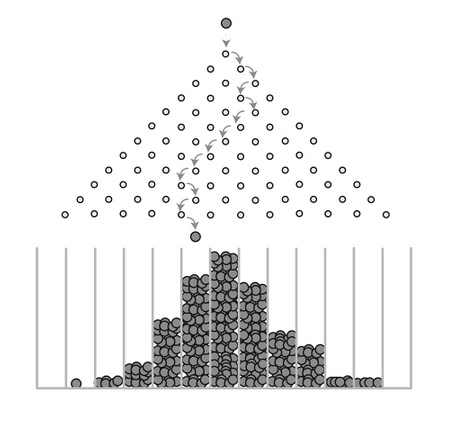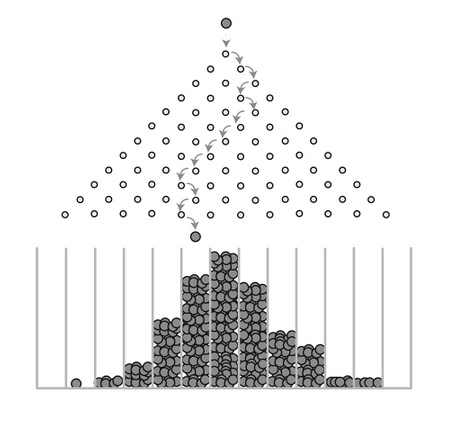

In our case though, the pegs, represented by splitters, are not arranged regularly like in a Galton board.